# Numerical Derivatives in Numpy/Python

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
%matplotlib inline
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewdith':2.5})

First, create a function of variable $t$ with random noise added to avoid using a straight functional form.

In [53]:
t = np.linspace(-4.0*np.pi,4.0*np.pi,100)
y_smooth = (np.sin(t/2))**2 + np.cos(t/4)
np.random.seed()
y = y_smooth + 0.05*np.random.rand(len(t))
y = y - 0.1*np.random.rand(len(t))

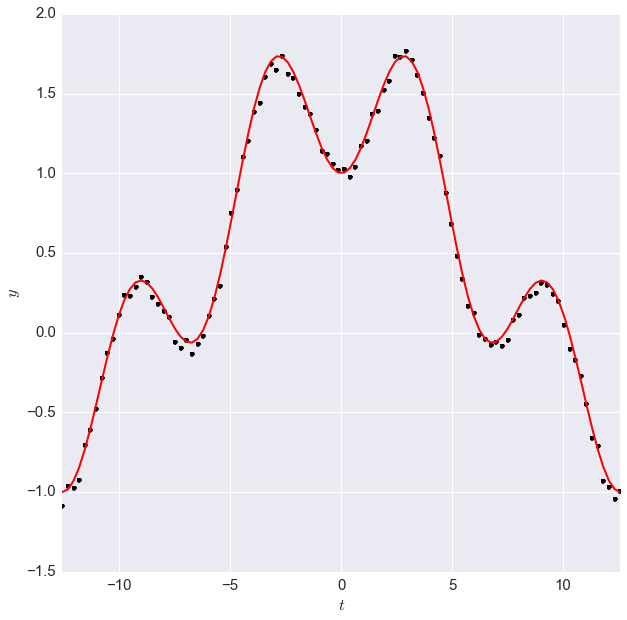

In [54]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(t,y,'k.',markersize=10)
ax.plot(t,y_smooth,'r',linewidth=2)
ax.set_xlim([t[0],t[-1]])
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y$')
plt.show()

## Numpy Gradient Function

In [55]:
dt = t[1] - t[0]
dydt_smooth = np.gradient(y_smooth,dt)
dydt = np.gradient(y,dt)
dydt_exact = np.sin(t/2)*np.cos(t/2) - 1.0/4.0*np.sin(t/4)

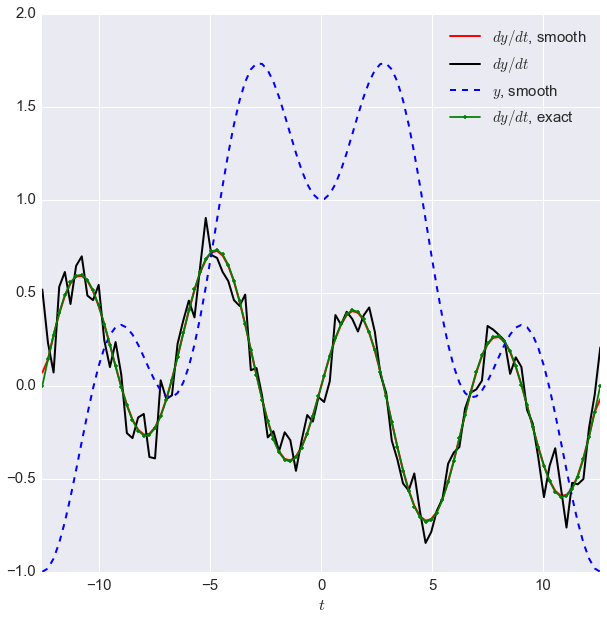

In [56]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(t,dydt_smooth,'r',linewidth=2,label=r'$dy/dt$, smooth')
ax.plot(t,dydt,'k',linewidth=2,label=r'$dy/dt$')
ax.plot(t,y_smooth,'--b',linewidth=2,label=r'$y$, smooth')
ax.plot(t,dydt_exact,'.-g',label=r'$dy/dt$, exact')
ax.set_xlim([t[0],t[-1]])
ax.set_xlabel(r'$t$')
ax.legend()
plt.show()

Now, let's interpolate between the noisy points and take the derivative.

In [57]:
t_interp = np.linspace(t[0],t[-1],10000)
y_interp = np.interp(t_interp,t,y)
f_interp = interp1d(t,y,kind='cubic')
y_interp2 = f_interp(t_interp)

In [58]:
dydt_interp = np.gradient(y_interp,np.gradient(t_interp))
dydt_interp2 = np.gradient(y_interp2,np.gradient(t_interp))

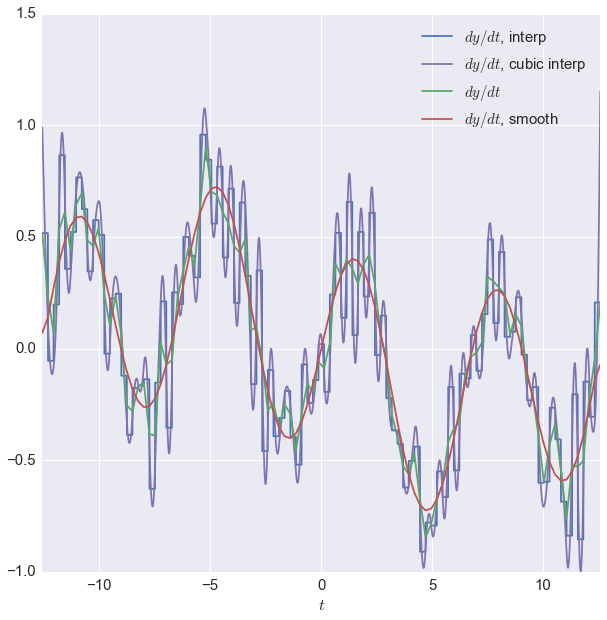

In [59]:
cp = sns.color_palette()
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(t_interp,dydt_interp,color=cp[0],label=r'$dy/dt$, interp')
ax.plot(t_interp,dydt_interp2,color=cp[3],label=r'$dy/dt$, cubic interp')
ax.plot(t,dydt,color=cp[1],label=r'$dy/dt$')
ax.plot(t,dydt_smooth,color=cp[2],label=r'$dy/dt$, smooth')
ax.set_xlim([t[0],t[-1]])
ax.set_xlabel(r'$t$')
ax.legend()
plt.show()

What if instead of having noise, we just have points which are very far apart?

In [72]:
t_far = t[::3]
y_far = (np.sin(t_far/2))**2 + np.cos(t_far/4)

In [73]:
dydt_far = np.gradient(y_far,np.gradient(t_far))

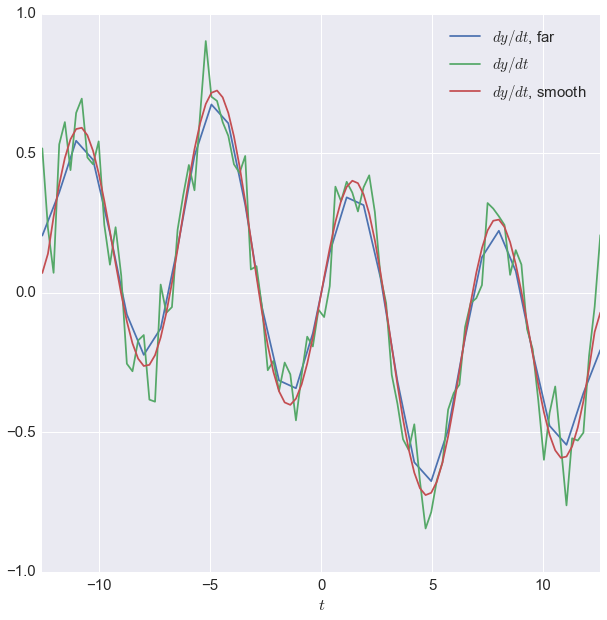

In [74]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(t_far,dydt_far,color=cp[0],label=r'$dy/dt$, far')
ax.plot(t,dydt,color=cp[1],label=r'$dy/dt$')
ax.plot(t,dydt_smooth,color=cp[2],label=r'$dy/dt$, smooth')
ax.set_xlim([t[0],t[-1]])
ax.set_xlabel(r'$t$')
ax.legend()
plt.show()